In [ ]:
import pandas
import matplotlib.pyplot as plt
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import os

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_5 (Flatten)         (None, 576)              

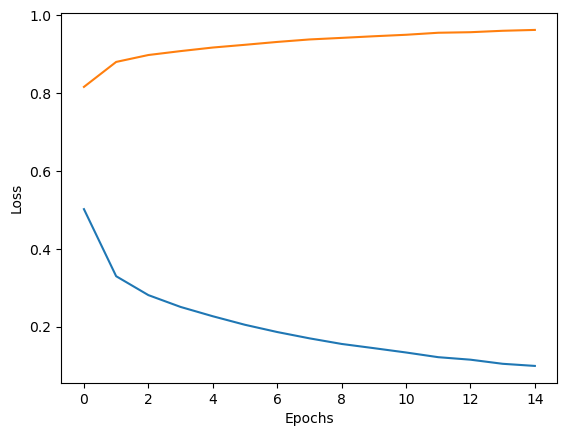

In [19]:
def train_and_store_model():

    #Data loading
    fashion_mnist = tf.keras.datasets.fashion_mnist
    (X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

    class_names = [
    "Camiseta", "Pantalon", "Suéter", "Vestido", "Abrigo",
    "Sandalía", "Camisa", "Zapatillas", "Bolso", "Botas"
    ]

    #Normalize data
    X_train = X_train / 255.0
    X_test = X_test / 255.0

    #Expand dimension 
    X_train = X_train[..., tf.newaxis]
    X_test = X_test[..., tf.newaxis]

    #Create model
    cnn_model = models.Sequential()
    cnn_model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(28,28,1)))
    cnn_model.add(layers.MaxPooling2D((2,2)))
    cnn_model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
    cnn_model.add(layers.MaxPooling2D((2,2)))
    cnn_model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
    cnn_model.add(layers.Flatten())
    cnn_model.add(layers.Dense(64, activation='relu'))
    cnn_model.add(layers.Dense(10))
    cnn_model.summary()


    # ----8. Compilar y entrenar el modelo
    cnn_model.compile(optimizer = 'adam',
                loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics = ['accuracy'])


    history = cnn_model.fit(X_train, Y_train, epochs=15, batch_size=32)

    
    cnn_model.save('models/cnn_model.keras')

    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')

    return history

train_and_store_model()

In [48]:
def predict(model, path):
    #Loading and preprocessing the image
    original = cv2.imread(path)

    image = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (28,28))
    image_array = np.array(image)
    image_array = image_array / 255.0

    #Expand dimension
    expanded_image_array = image_array.reshape(1, 28, 28, 1)

    #Predict
    pred = model.predict(expanded_image_array)

    class_names = [
    "Camiseta", "Pantalon", "Suéter", "Vestido", "Abrigo",
    "Sandalía", "Camisa", "Zapatillas", "Bolso", "Botas"
    ]

    return original, image_array, class_names[np.argmax(pred)]


1/1 [==============================] - 0s 11ms/step


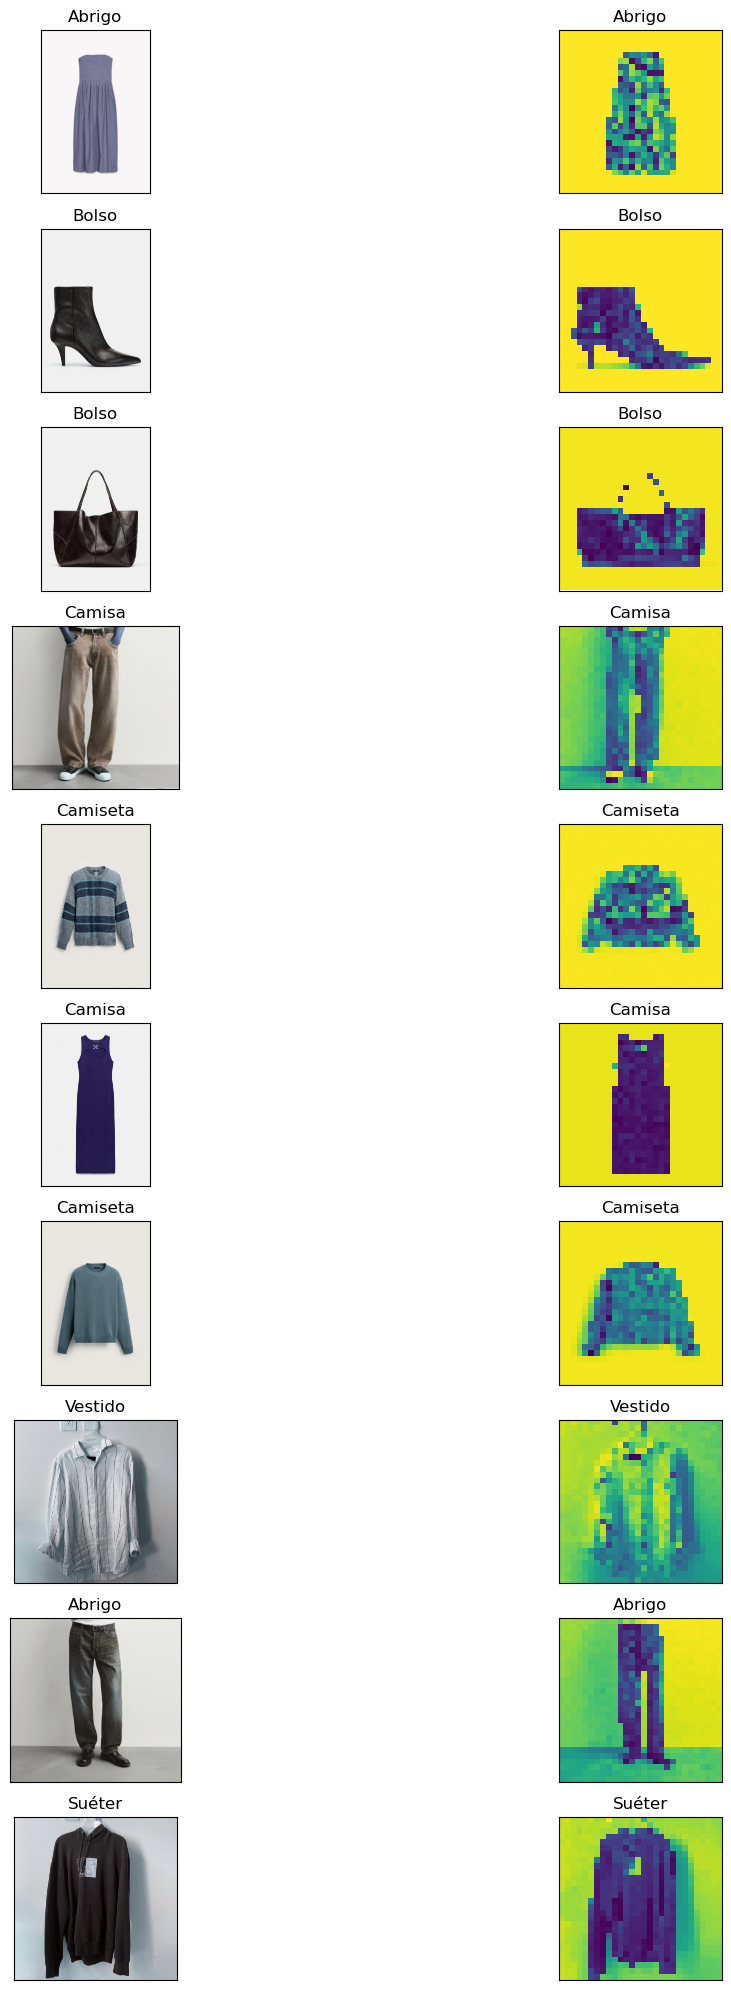

In [65]:
# for all images in example_inputs, predict the class, and show the image with the predicted class
#this should be a subplot of 10 images ( 2 rows and 5 columns )

#Load model
cnn_model = tf.keras.models.load_model('models/cnn_model.keras')

#get list of images in example_inputs as paths
images = [f'example_inputs/{file}' for file in os.listdir('example_inputs')]

#Predict
predictions = []
for image in images:
    predictions.append(predict(cnn_model, image))

#Show images with predictions
#for each row show the original, the processed image and their prediction, so each row should be 2 columns and the prediction as title
#thiis is what the predict function should return return: original, image_array, class_names[np.argmax(pred)]
#Get rid of the axes


fig, axs = plt.subplots(10, 2, figsize=(15, 20))

for ax in axs.flat:
    ax.set_xticks([])
    ax.set_yticks([])

for i in range(len(images)):
    axs[i,0].imshow(predictions[i][0])
    axs[i,1].imshow(predictions[i][1])
    axs[i,1].set_title(predictions[i][2])
    axs[i,0].set_title(predictions[i][2])

#tight layout
plt.tight_layout()
